In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk

units_per_pixel = 3 # cm

%matplotlib inline

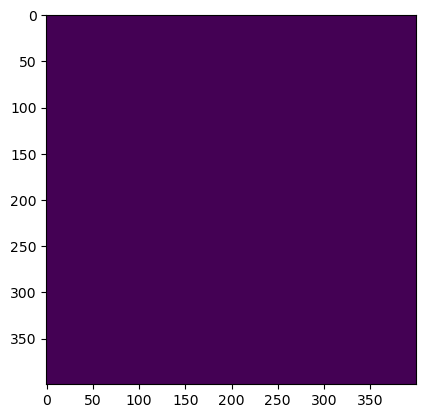

In [45]:
img = np.zeros((400, 400), dtype=np.uint8)
plt.imshow(img)

In [46]:
disk((200, 200), 100)

(array([101, 101, 101, ..., 299, 299, 299]),
 array([186, 187, 188, ..., 212, 213, 214]))

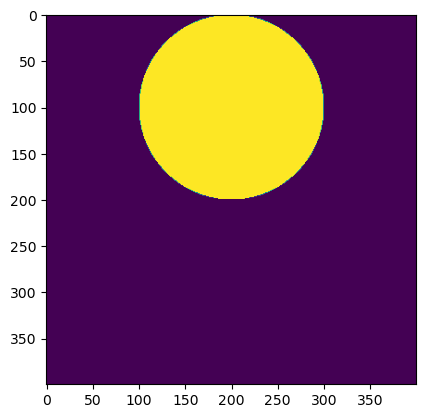

In [47]:
rr, cc = disk((100, 200), 100, shape=img.shape)
img[rr, cc] = 1
plt.imshow(img)

In [48]:
blank_barn = np.zeros((300, 300), dtype=np.uint8)
num_rows = 3
num_nipples = 38
distance_between_lines = 300 # cm
distance_between_nipples = 20 # cm
nipple_points = []

x_offset = 30 # cm
y_offset = 30 # cm

pixels_between_lines = distance_between_lines / units_per_pixel
pixels_between_nipples = distance_between_nipples / units_per_pixel

for i in range(num_rows):
    for j in range(num_nipples):
        nipple_points.append((j * pixels_between_nipples + y_offset, i * pixels_between_lines + x_offset))

[ 30  36  43  50  56  63  70  76  83  90  96 103 110 116 123 130 136 143
 150 156 163 170 176 183 190 196 203 210 216 223 230 236 243 250 256 263
 270 276  30  36  43  50  56  63  70  76  83  90  96 103 110 116 123 130
 136 143 150 156 163 170 176 183 190 196 203 210 216 223 230 236 243 250
 256 263 270 276  30  36  43  50  56  63  70  76  83  90  96 103 110 116
 123 130 136 143 150 156 163 170 176 183 190 196 203 210 216 223 230 236
 243 250 256 263 270 276] [ 30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30  30
  30  30 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 230 230 230 230 230 230 230 230 230 230 230 230 230 230
 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230 230
 230 230 230 230 230 230]
True


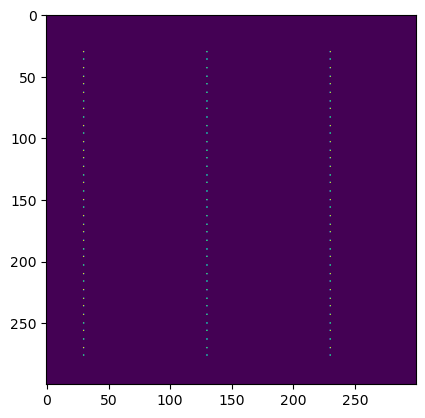

In [49]:
nipple_points_np = np.array(nipple_points, dtype=np.int32)
blank_barn[nipple_points_np[:, 0], nipple_points_np[:, 1]] = 1
print(nipple_points_np[:,0], nipple_points_np[:, 1])
plt.imshow(blank_barn)
print(np.any(blank_barn == 1))

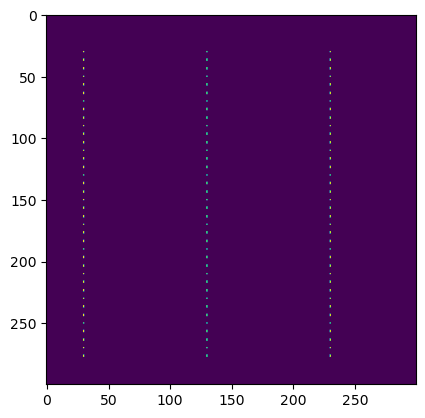

In [50]:
for nipple in nipple_points:
    rr, cc = disk(nipple, 1, shape=blank_barn.shape)
    blank_barn[rr, cc] = 1

plt.imshow(blank_barn)

In [51]:
nipple_points_np[:]

array([[ 30,  30],
       [ 36,  30],
       [ 43,  30],
       [ 50,  30],
       [ 56,  30],
       [ 63,  30],
       [ 70,  30],
       [ 76,  30],
       [ 83,  30],
       [ 90,  30],
       [ 96,  30],
       [103,  30],
       [110,  30],
       [116,  30],
       [123,  30],
       [130,  30],
       [136,  30],
       [143,  30],
       [150,  30],
       [156,  30],
       [163,  30],
       [170,  30],
       [176,  30],
       [183,  30],
       [190,  30],
       [196,  30],
       [203,  30],
       [210,  30],
       [216,  30],
       [223,  30],
       [230,  30],
       [236,  30],
       [243,  30],
       [250,  30],
       [256,  30],
       [263,  30],
       [270,  30],
       [276,  30],
       [ 30, 130],
       [ 36, 130],
       [ 43, 130],
       [ 50, 130],
       [ 56, 130],
       [ 63, 130],
       [ 70, 130],
       [ 76, 130],
       [ 83, 130],
       [ 90, 130],
       [ 96, 130],
       [103, 130],
       [110, 130],
       [116, 130],
       [123,

In [4]:
vision = 3

def make_array(d):
    """Generates visible cells with increasing distance."""
    a = np.array([[-d, 0], [d, 0], [0, -d], [0, d]])
    np.random.shuffle(a)
    return a

arrays = [make_array(d) for d in range(1, vision + 1)]
arrays[0]
np.vstack(arrays)

array([[-1,  0],
       [ 1,  0],
       [ 0,  1],
       [ 0, -1],
       [ 0, -2],
       [-2,  0],
       [ 0,  2],
       [ 2,  0],
       [-3,  0],
       [ 0, -3],
       [ 0,  3],
       [ 3,  0]])

In [3]:
def make_visible_locs(vision):
    """Computes the kernel of visible cells.

    vision: int distance
    """

    def make_array(d):
        """Generates visible cells with increasing distance."""
        a = np.array([[-d, 0], [d, 0], [0, -d], [0, d]])
        np.random.shuffle(a)
        return a

    arrays = [make_array(d) for d in range(1, vision + 1)]
    return np.vstack(arrays)

visable_locs = make_visible_locs(7)
visable_locs

array([[ 1,  0],
       [ 0,  1],
       [ 0, -1],
       [-1,  0],
       [ 0, -2],
       [ 2,  0],
       [-2,  0],
       [ 0,  2],
       [ 0,  3],
       [-3,  0],
       [ 0, -3],
       [ 3,  0],
       [ 0, -4],
       [-4,  0],
       [ 0,  4],
       [ 4,  0],
       [ 5,  0],
       [-5,  0],
       [ 0,  5],
       [ 0, -5],
       [-6,  0],
       [ 6,  0],
       [ 0,  6],
       [ 0, -6],
       [ 0,  7],
       [ 7,  0],
       [ 0, -7],
       [-7,  0]])

In [2]:
test_barn = np.zeros((20, 20), dtype=np.uint8)

one_indicices = np.array([1, 3, 5, 7, 9, 11], dtype=np.int32)


test_barn[:, one_indicices] = 1

test_barn
results = test_barn[visable_locs[:, 0], visable_locs[:, 1]]
test_barn[visable_locs[:, 0], visable_locs[:, 1]]

NameError: name 'visable_locs' is not defined

In [100]:
water_locations = visable_locs[np.argwhere(results == 1)][:,0, :]
test_barn[water_locations[:, 0], water_locations[:, 1]]

array([1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [24]:
import numpy as np
from random import random, randint



In [22]:
random() * 2 * 3.14159

0.7920384009196715

In [35]:
randint(0, 2) - 1

-1

In [38]:
np.random.randint(0, 3, (200)) - 1

array([ 1, -1,  0,  1,  1,  0, -1,  0, -1,  0,  0,  1, -1,  1,  1, -1, -1,
       -1,  0, -1,  1,  1,  1,  0,  0, -1,  0,  0, -1,  0, -1,  1, -1,  0,
        0, -1,  0,  0, -1,  1,  1, -1,  1, -1,  1,  0,  1,  1, -1,  1,  1,
        1, -1, -1,  1,  1,  1,  1,  0,  0,  0,  1,  0, -1,  0,  0, -1, -1,
        1, -1,  1,  0, -1,  0,  1,  0,  1, -1, -1, -1,  0,  1,  0,  1, -1,
        1, -1, -1, -1,  1,  0,  0, -1,  0,  1, -1, -1,  0,  0,  1,  1,  1,
        0,  0,  1,  1,  1, -1, -1,  1, -1,  0,  0,  0,  0, -1,  0, -1, -1,
        1, -1,  1, -1,  0, -1,  1,  0,  0,  0,  0,  0, -1, -1, -1,  1, -1,
        0,  0,  1,  1, -1,  0,  0,  1, -1,  0, -1,  0,  0, -1, -1,  0, -1,
        1,  0,  0,  0,  1,  0, -1, -1,  0, -1,  1, -1,  1, -1,  1, -1,  1,
        1, -1, -1,  1,  1,  1, -1,  0, -1,  0, -1,  1,  1,  1, -1,  1,  0,
       -1, -1,  1, -1, -1, -1,  0,  1,  0,  1, -1, -1,  0])

In [79]:
test_dist = np.random.random((200)) * 20
np.round(test_dist)
np.mean(test_dist), np.std(test_dist), np.round(test_dist)

(10.548763861780913,
 5.76253891622441,
 array([19.,  3., 17., 17., 15., 19.,  6., 18., 12.,  9., 19.,  3., 13.,
        16., 16., 15.,  2., 12., 10.,  7.,  2.,  1.,  3.,  4., 14.,  3.,
         9.,  9., 19., 15., 13., 11., 10., 19., 19., 13., 18., 12.,  7.,
        14.,  5., 19., 16., 10.,  4., 11., 19.,  1.,  8.,  4.,  5., 11.,
         8., 17., 15.,  7.,  0.,  8., 12., 15., 17., 17.,  9., 19.,  2.,
        16., 14.,  5.,  9.,  4., 11.,  1., 16., 18.,  4., 12., 20., 17.,
         9.,  0.,  9., 15.,  9., 15.,  8., 16., 13., 13., 16.,  1., 20.,
        19., 15., 17.,  4.,  8., 14., 11., 15., 19.,  8.,  2., 12., 10.,
        13.,  8.,  7.,  3.,  3., 13.,  7., 13.,  5.,  6.,  3., 16.,  4.,
        12., 19.,  4.,  2.,  3., 17., 15.,  9., 10.,  3.,  7.,  2., 19.,
        13.,  9., 14., 19., 15.,  5., 12.,  4.,  1., 11.,  9., 11.,  5.,
         7.,  9., 17., 13., 19.,  3.,  2., 11.,  3., 11.,  7.,  7.,  8.,
         6., 18.,  5., 19., 12., 17., 14., 17., 19.,  2., 18., 17., 15.,
        16.

In [82]:
test = 1
if test:
    print("C logic")

C logic


In [83]:
def make_locs(n, m):
    """Makes array where each row is an index in an `n` by `m` grid.

    n: int number of rows
    m: int number of cols

    returns: NumPy array
    """
    t = [(i, j) for i in range(n) for j in range(m)]
    return np.array(t)

In [89]:
test = make_locs(30, 4000)
np.random.shuffle(test)
test

array([[  22,  441],
       [   7, 2324],
       [   1, 3553],
       ...,
       [  23, 1465],
       [  16, 3530],
       [  13, 3638]])

In [9]:
test = np.zeros((12000, 1219))
test.shape

(12000, 1219)

In [6]:
test = np.arange(0, 7)

In [7]:
test_mtx = np.tile(test, (7,1))
(test_mtx - 3)

array([[-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3],
       [-3, -2, -1,  0,  1,  2,  3]])

In [19]:
test_mtx.T

array([[ 3,  3,  3,  3,  3,  3,  3],
       [ 2,  2,  2,  2,  2,  2,  2],
       [ 1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0],
       [-1, -1, -1, -1, -1, -1, -1],
       [-2, -2, -2, -2, -2, -2, -2],
       [-3, -3, -3, -3, -3, -3, -3]])

In [4]:
test_arr = np.array([test_mtx - 3, (3 - test_mtx).T])
test_arr

NameError: name 'test_mtx' is not defined

In [45]:
test_arr.reshape(49, 2, order='A')

array([[-3, -2],
       [-1,  0],
       [ 1,  2],
       [ 3, -3],
       [-2, -1],
       [ 0,  1],
       [ 2,  3],
       [-3, -2],
       [-1,  0],
       [ 1,  2],
       [ 3, -3],
       [-2, -1],
       [ 0,  1],
       [ 2,  3],
       [-3, -2],
       [-1,  0],
       [ 1,  2],
       [ 3, -3],
       [-2, -1],
       [ 0,  1],
       [ 2,  3],
       [-3, -2],
       [-1,  0],
       [ 1,  2],
       [ 3,  3],
       [ 3,  3],
       [ 3,  3],
       [ 3,  3],
       [ 2,  2],
       [ 2,  2],
       [ 2,  2],
       [ 2,  1],
       [ 1,  1],
       [ 1,  1],
       [ 1,  1],
       [ 0,  0],
       [ 0,  0],
       [ 0,  0],
       [ 0, -1],
       [-1, -1],
       [-1, -1],
       [-1, -1],
       [-2, -2],
       [-2, -2],
       [-2, -2],
       [-2, -3],
       [-3, -3],
       [-3, -3],
       [-3, -3]])

In [3]:
np.unique(test_arr.reshape(49, 2, order='F'), axis=0)

NameError: name 'test_arr' is not defined

In [54]:
from math import cos, sin, tan, pi

angle = np.random.random() * 2 * pi - pi

x = 7 * cos(angle)
y = 7 * sin(angle)

mag = np.linalg.norm([x, y])

x, y, mag, angle

(-1.7803983706135125, 6.769799232024297, 7.0, 1.8279642401061507)

In [57]:
target_point = int(x), int(y)
target_point

(-1, 6)

In [89]:
search_angles = (np.random.random(20) * pi / 2) - pi / 4 + (np.random.random() * 2 * pi - pi)
search_angles

array([-2.40090949, -3.19737803, -2.54832065, -3.45986637, -2.69207055,
       -2.77012174, -3.18149344, -2.49149973, -2.74408505, -2.98029128,
       -3.22727953, -3.5393743 , -2.7655595 , -2.68189216, -3.08591145,
       -2.59038481, -3.81890957, -3.09875607, -2.9509276 , -3.68900691])

In [90]:
np.random.randn()

-2.1336281250460645

In [94]:
x = (7 * np.cos(search_angles)).astype(np.int32)
x

array([-5, -6, -5, -6, -6, -6, -6, -5, -6, -6, -6, -6, -6, -6, -6, -5, -5,
       -6, -6, -5], dtype=int32)

In [95]:
y = (np.sin(search_angles) * 7).astype(np.int32)
y

array([-4,  0, -3,  2, -3, -2,  0, -4, -2, -1,  0,  2, -2, -3,  0, -3,  4,
        0, -1,  3], dtype=int32)

In [97]:
np.array([x, y]).T

array([[-5, -4],
       [-6,  0],
       [-5, -3],
       [-6,  2],
       [-6, -3],
       [-6, -2],
       [-6,  0],
       [-5, -4],
       [-6, -2],
       [-6, -1],
       [-6,  0],
       [-6,  2],
       [-6, -2],
       [-6, -3],
       [-6,  0],
       [-5, -3],
       [-5,  4],
       [-6,  0],
       [-6, -1],
       [-5,  3]], dtype=int32)

In [100]:
from enum import Enum

class TestEnum(Enum):
    A = 1
    B = 2
    C = 3

In [101]:
TestEnum.A

<TestEnum.A: 1>

In [102]:
TestEnum.A == TestEnum.A

True

<function numpy.array>

In [4]:
results = np.random.normal(75, 10, (100)).astype(np.int8)
results

array([ 64,  60,  77,  70,  72,  75,  64,  75,  61,  78,  77,  67,  56,
        66,  79,  74,  73,  79, 102,  73,  82,  77,  82,  67,  73,  60,
        74,  89,  75,  61,  65,  81,  68,  75,  90,  68,  91,  69,  78,
        76,  75,  72,  85,  61,  72,  93,  71,  73,  93,  77,  62,  78,
        87,  72,  60,  51,  73,  77,  72,  70,  64,  62,  64,  77,  72,
        84,  74,  76,  74,  80,  65,  86,  80,  74,  61,  75,  84,  64,
        73,  90,  91,  59,  64,  50,  93,  68,  73,  81,  72,  74,  81,
        75,  71,  93,  84,  69,  69,  78,  80,  71], dtype=int8)

In [9]:
np.mean(results)

75.98410378804094

In [37]:
rand_points = np.random.randint(0, 100, (100, 2))
rand_points

array([[55, 53],
       [ 6, 21],
       [66, 74],
       [54, 95],
       [31, 60],
       [10, 47],
       [23, 70],
       [71, 61],
       [10,  0],
       [77, 37],
       [33, 56],
       [82, 97],
       [54, 76],
       [70,  4],
       [57, 95],
       [ 3, 36],
       [22, 22],
       [97, 44],
       [21, 69],
       [73, 79],
       [93, 64],
       [35, 97],
       [61, 72],
       [29, 76],
       [93, 81],
       [57,  7],
       [26, 32],
       [95, 61],
       [24, 47],
       [91, 35],
       [79, 26],
       [11, 78],
       [12, 27],
       [94, 85],
       [90, 11],
       [95, 31],
       [ 7, 58],
       [29, 18],
       [51, 44],
       [38, 83],
       [27, 61],
       [58, 43],
       [66, 63],
       [65, 79],
       [66, 49],
       [39, 45],
       [ 6, 61],
       [56, 82],
       [87,  2],
       [23, 20],
       [37, 78],
       [60, 28],
       [78,  9],
       [74, 31],
       [12, 40],
       [90, 62],
       [68, 43],
       [ 2, 83],
       [53, 42

In [39]:
x_top = np.where( rand_points[:, 0] < 75)
x_bottom = np.where( rand_points[:, 0] > 25)
x_results = np.intersect1d(x_top, x_bottom)
x_results

array([ 0,  2,  3,  4,  7, 10, 12, 13, 14, 19, 21, 22, 23, 25, 26, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 47, 50, 51, 53, 56, 58, 61, 62, 64, 66,
       68, 69, 70, 71, 72, 74, 75, 76, 77, 80, 81, 82, 83, 85, 86, 91, 95,
       96, 99])

In [40]:
y_top = np.where( rand_points[:, 1] < 75)
y_bottom = np.where( rand_points[:, 1] > 25)
y_results = np.intersect1d(y_top, y_bottom)
y_results

array([ 0,  2,  4,  5,  6,  7,  9, 10, 15, 17, 18, 20, 22, 26, 27, 28, 29,
       30, 32, 35, 36, 38, 40, 41, 42, 44, 45, 46, 51, 53, 54, 55, 56, 58,
       59, 60, 65, 66, 68, 69, 70, 73, 74, 75, 78, 79, 80, 82, 85, 86, 90,
       91, 92, 94, 96, 98, 99])

In [41]:
results = np.intersect1d(x_results, y_results)
results

array([ 0,  2,  4,  7, 10, 22, 26, 38, 40, 41, 42, 44, 45, 51, 53, 56, 58,
       66, 68, 69, 70, 74, 75, 80, 82, 85, 86, 91, 96, 99])

In [25]:
rand_points

array([[ 5, 29],
       [78, 79],
       [62, 55],
       [85, 74],
       [62, 98],
       [37, 55],
       [90, 38],
       [93, 89],
       [75, 17],
       [79, 46],
       [97, 74],
       [84,  6],
       [61, 56],
       [24, 29],
       [ 9, 46],
       [52, 48],
       [ 8, 30],
       [83, 32],
       [62, 69],
       [64,  5],
       [ 9, 67],
       [68, 44],
       [26,  6],
       [93, 42],
       [94, 83],
       [61, 67],
       [25, 31],
       [47,  7],
       [78, 24],
       [ 7, 92],
       [15, 44],
       [55, 50],
       [61, 38],
       [11, 72],
       [88, 95],
       [97, 21],
       [38, 50],
       [38, 75],
       [26, 68],
       [66, 27],
       [42, 15],
       [77, 59],
       [10, 92],
       [71, 39],
       [22,  0],
       [96, 65],
       [91, 41],
       [71, 25],
       [14, 67],
       [61, 77],
       [56, 62],
       [27, 42],
       [20, 88],
       [29, 50],
       [96, 13],
       [18, 85],
       [ 8, 44],
       [28, 86],
       [51, 48

In [46]:
result_first = rand_points[results]
result_first

array([[55, 53],
       [66, 74],
       [31, 60],
       [71, 61],
       [33, 56],
       [61, 72],
       [26, 32],
       [51, 44],
       [27, 61],
       [58, 43],
       [66, 63],
       [66, 49],
       [39, 45],
       [60, 28],
       [74, 31],
       [68, 43],
       [53, 42],
       [54, 37],
       [33, 54],
       [61, 74],
       [74, 54],
       [71, 31],
       [71, 69],
       [69, 41],
       [73, 31],
       [50, 56],
       [37, 41],
       [59, 67],
       [39, 26],
       [68, 36]])

In [47]:
result_second = rand_points[np.logical_and(np.logical_and(rand_points[:, 0] < 75, rand_points[:, 0] > 25), np.logical_and(rand_points[:, 1] < 75, rand_points[:, 1] > 25))]
result_second

array([[55, 53],
       [66, 74],
       [31, 60],
       [71, 61],
       [33, 56],
       [61, 72],
       [26, 32],
       [51, 44],
       [27, 61],
       [58, 43],
       [66, 63],
       [66, 49],
       [39, 45],
       [60, 28],
       [74, 31],
       [68, 43],
       [53, 42],
       [54, 37],
       [33, 54],
       [61, 74],
       [74, 54],
       [71, 31],
       [71, 69],
       [69, 41],
       [73, 31],
       [50, 56],
       [37, 41],
       [59, 67],
       [39, 26],
       [68, 36]])

In [50]:
(result_first == result_second).all()
result_first[0, 0] = 0
(result_first == result_second).all()

False

In [56]:
size = np.arange(0, 6).reshape(6, 1)
size.shape

(6, 1)

In [70]:
np.argwhere(np.ones((6, 6)))

array([[0, 0],
       [0, 1],
       [0, 2],
       [0, 3],
       [0, 4],
       [0, 5],
       [1, 0],
       [1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [2, 0],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [3, 0],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [4, 0],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [5, 0],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5]])

In [69]:
for i in range(35000):
    np.argwhere(np.zeros((100, 100)) == 0)